#                        Linear Regression with one variable

$$ h(x) = \theta_0 + \theta_1x  $$
h(x) -> Hypothesis function <br>
$\theta_0$,$\theta_1$ -> Parameters <br>
x -> independent variable <br>
$\Theta$ = $\begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}$

Goal : Choose the parameters such that h(x) is close to dependent variable(y) for training example (x,y)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv('ex1data1.txt', header=None)

In [4]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Profit vs Population')

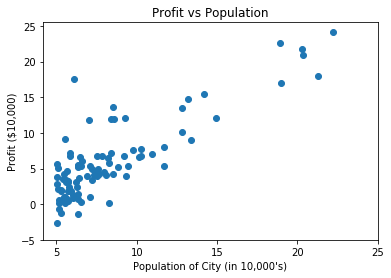

In [7]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5, 30, step=5))
plt.yticks(np.arange(-5, 30, step=5))
plt.xlabel("Population of City (in 10,000's)")
plt.ylabel("Profit ($10,000)")
plt.title("Profit vs Population")

Cost Function, J($\Theta$) or J($\theta_0$,$\theta_1$) = $\left( \frac{1}{2m} \right)$ $\sum_{i=1}^{m}$ $\left( (h(x)^{(i)} - y^{(i)} \right)^{2}$ <br>
It gives us the error(difference between predicted value and actual value). Lesser the error, better is the hypothesis.


In [22]:
def CostFunction(X, y, theta):
    m = len(y)
    predicted = X.dot(theta)
    squared_error = (predicted - y)**2
    return (1/(2*m))*np.sum(squared_error)

Initialize X,y and compute the cost using $\Theta$ = 0 or random intialization

In [37]:
data_n=data.values
m=len(data_n[:,-1])
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta = np.random.rand(2,1)
#theta = np.zeros((2,1))

CostFunction(X,y,theta)

14.366780660278437

Now implement gradient descent algorithm to optimize $\Theta$, by minimizing the cost function J($\Theta$)

Gradient descent: <br>
Repeat until convergence { <br>
&emsp; $\theta_j$ := $\theta_j$ - $\alpha$ $\frac{\partial}{\partial \theta_j} J$($\theta_0$ ,$\theta_1$) <br> 
} (simultaneously update j=0 and j=1) <br>

$\alpha$ -> Learning rate

This is also called **Batch Gradient Descent** -> each step of gradient descent uses all the training examples.

In [38]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(CostFunction(X,y,theta))
    
    return theta, J_history

theta,J_history = gradientDescent(X,y,theta,0.01,1500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-3.59 + 1.16x1


Cost Function for linear regression is always a **Convex Function**. Therefore, it has only one global minimum.<br>
And, hence, gradient descent would always find global minimum.

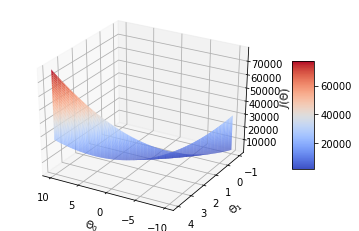

In [39]:
from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=CostFunction(X,y,t)
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(30,120)

Plotting Cost function vs number of iterations will let us know if gradient descent is working or not. <br>
J($\theta$) should be decreasing after every iteration, indicating gradient descent is working properly. <br>
If the curve flattens after decreasing, it indicates gradient descent has converged.

How to choose learning rate, $\alpha$?
- For sufficiently small $\alpha$, J($\Theta$) should be decreasing on every iteration.<br>
- But if $\alpha$ is too small, gradient descent can be slow to converge.<br>
- If $\alpha$ is too large, J($\Theta$) may not decrease on every iteration; may not converge (or slow converge is also possible)<br>
To choose $\alpha$, try: <br>
&emsp; ...., 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1,......

Text(0.5, 1.0, 'Cost function using Gradient Descent')

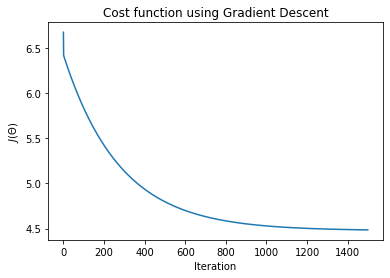

In [40]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

The line below is a best fit line. Which means it is the best hypothesis that fits the given data. <br> 
This hypothesis is best considering it has optimum parameters vector, $\Theta$.
This optimum $\Theta$ minimizes the cost function or error when gradient descent algorithm is applied.

Text(0.5, 1.0, 'Profit vs Population')

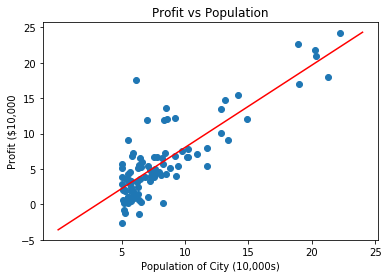

In [41]:
plt.scatter(data[0],data[1])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit vs Population")